# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

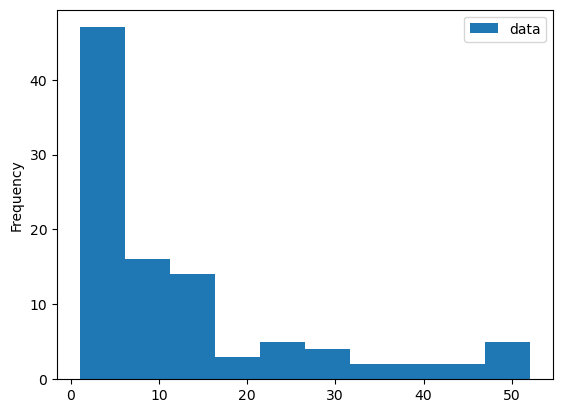

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

Pros:
- visualizes the shape of the distirbution
- visualize mode

Cons:

- cannot determine mean or median
- cannot explicitly identify individual outliers


<Axes: >

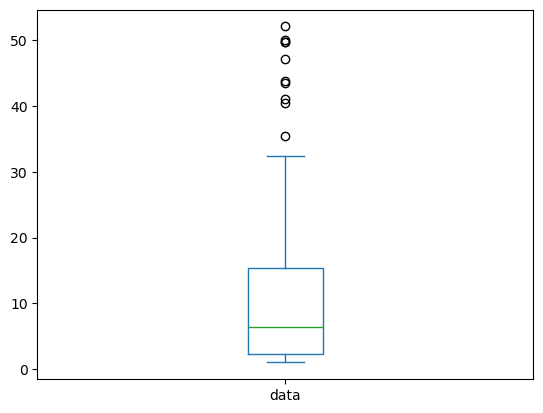

In [3]:
df.plot.box()

Pros:
- detect outliers based on the IQR rule
- visualize the median
- vizualize the middle 50% of the data

Cons:
- cannot view the shape of the distribution

<b>In terms of the business problem, a <i>boxplot</i> would be the ideal choice</b>. This is because we were specifically asked that "an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices."

We can easily visualize how much more the expensive drugs <i>(i.e. the outliers)</i> tend to be in the context of the other prices <i>(i.e. data that falls within the middle 50%)</i>. As all we have to do is look at the dots above the upper fence in the boxplot.

Histograms simply do not capture the level of granularity required to answer this business problem. At most, the histogram can inform us how many drug prices fall within the highest bin, however it doesn't return what the prices actually are



To make the visualization more <b>visually interesting, clear and informative</b>, I would add a title, such as <i>Distribution of Drug Prices </i> as well as appropriate x and y labels; such as prices on the y axis. I'd also highlight one or two of the drugs that are considered outliers, by highlighting the data point as red and including the name of the drug on the graph. This would give the audience a clearer understanding that each of the outlier points are indeed a point within our data.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
cyber_df = pd.read_csv('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/cyber_security_attacks/cybersecurity_attacks.csv')
beth_df = pd.read_csv('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/beth_dataset/labelled_training_data.csv')
UNSW_df = pd.read_parquet('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/UNSW-NB15 dataset/UNSW_NB15_training-set.parquet')

In [5]:
def continuous_plots(df, features=None):
    if features is not None:
        # Only keep features that exist in the dataframe
        features = [feat for feat in features if feat in df.columns]
        # Filter to only numeric columns
        cont_cols = [feat for feat in features if pd.api.types.is_numeric_dtype(df[feat])]
        if not cont_cols:
            print("None of the provided features are numeric.")
            return
    else:
        # Default: select all numeric columns
        cont_cols = df.select_dtypes(include=[np.number]).columns

    n_cols = len(cont_cols)
    
    if n_cols == 0:
        print("No continuous columns found in the dataframe.")
        return

    # Create a subplot grid: one row per column, three columns (Histogram, KDE, Violin)
    fig, axes = plt.subplots(n_cols, 3, figsize=(15, 5 * n_cols))
    
    # If there's only one continuous column, ensure axes is 2D for consistency
    if n_cols == 1:
        axes = np.expand_dims(axes, axis=0)
    
    for i, col in enumerate(cont_cols):
        data = df[col].dropna()  # Drop missing values for clean plotting
        
        # Histogram using seaborn's histplot
        ax_hist = axes[i, 0]
        sns.histplot(data, ax=ax_hist, bins=30, kde=False)
        ax_hist.set_title(f'Histogram of {col}')
        
        # KDE plot using seaborn's kdeplot with a variance check
        ax_kde = axes[i, 1]
        if np.var(data) > 0:
            sns.kdeplot(data, ax=ax_kde)
        else:
            ax_kde.text(0.5, 0.5, 'Zero variance: KDE not computed',
                        horizontalalignment='center', verticalalignment='center')
        ax_kde.set_title(f'KDE of {col}')
        
        # Violin plot using seaborn's violinplot
        ax_violin = axes[i, 2]
        sns.violinplot(y=data, ax=ax_violin)
        ax_violin.set_title(f'Violin Plot of {col}')
    
    plt.tight_layout()
    plt.show()


In [6]:
def categorical_counts_plots(df, columns=None, figsize=(8, 4)):
    
    if columns is not None:
        # Keep only columns that exist in the DataFrame and are categorical
        cat_cols = [
            col for col in columns 
            if col in df.columns and (pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == object)
        ]
        if not cat_cols:
            print("None of the provided columns are categorical.")
            return
    else:
        # Default: select all categorical columns
        cat_cols = df.select_dtypes(include=['object', 'category']).columns

    n_cols = len(cat_cols)
    
    if n_cols == 0:
        print("No categorical columns found in the dataframe.")
        return

    # Adjust figure size: width stays the same, height scales with the number of categorical columns
    total_figsize = (figsize[0], figsize[1] * n_cols)
    fig, axes = plt.subplots(n_cols, 1, figsize=total_figsize)
    
    # Ensure axes is iterable even if there's only one subplot
    if n_cols == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cat_cols):
        # Order by the index of value_counts() (default: descending frequency)
        order = df[col].value_counts().index
        # Plot countplot horizontally by setting y=col
        sns.countplot(y=col, data=df, order=order, ax=ax)
        ax.set_title(f'Value Counts for {col}')
        ax.tick_params(axis='y', labelsize=10)
    
    plt.tight_layout()
    plt.show()

In [7]:
def calculate_summary_stats(df):
    
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['number'])
    
    # Compute mean, median, and mode for numeric columns.
    mean = df_numeric.mean()
    median = df_numeric.median()
    # In case of multiple modes, we select the first one for each column.
    mode = df_numeric.mode().iloc[0]
    
    # Combine the results into a single DataFrame
    stats_df = pd.DataFrame({
        'mean': mean,
        'median': median,
        'mode': mode
    })
    
    return stats_df

---

## BETH dataset

In [8]:
beth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763144 entries, 0 to 763143
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        763144 non-null  float64
 1   processId        763144 non-null  int64  
 2   threadId         763144 non-null  int64  
 3   parentProcessId  763144 non-null  int64  
 4   userId           763144 non-null  int64  
 5   mountNamespace   763144 non-null  int64  
 6   processName      763144 non-null  object 
 7   hostName         763144 non-null  object 
 8   eventId          763144 non-null  int64  
 9   eventName        763144 non-null  object 
 10  stackAddresses   763144 non-null  object 
 11  argsNum          763144 non-null  int64  
 12  returnValue      763144 non-null  int64  
 13  args             763144 non-null  object 
 14  sus              763144 non-null  int64  
 15  evil             763144 non-null  int64  
dtypes: float64(1), int64(10), object(5)
me

### Continuous

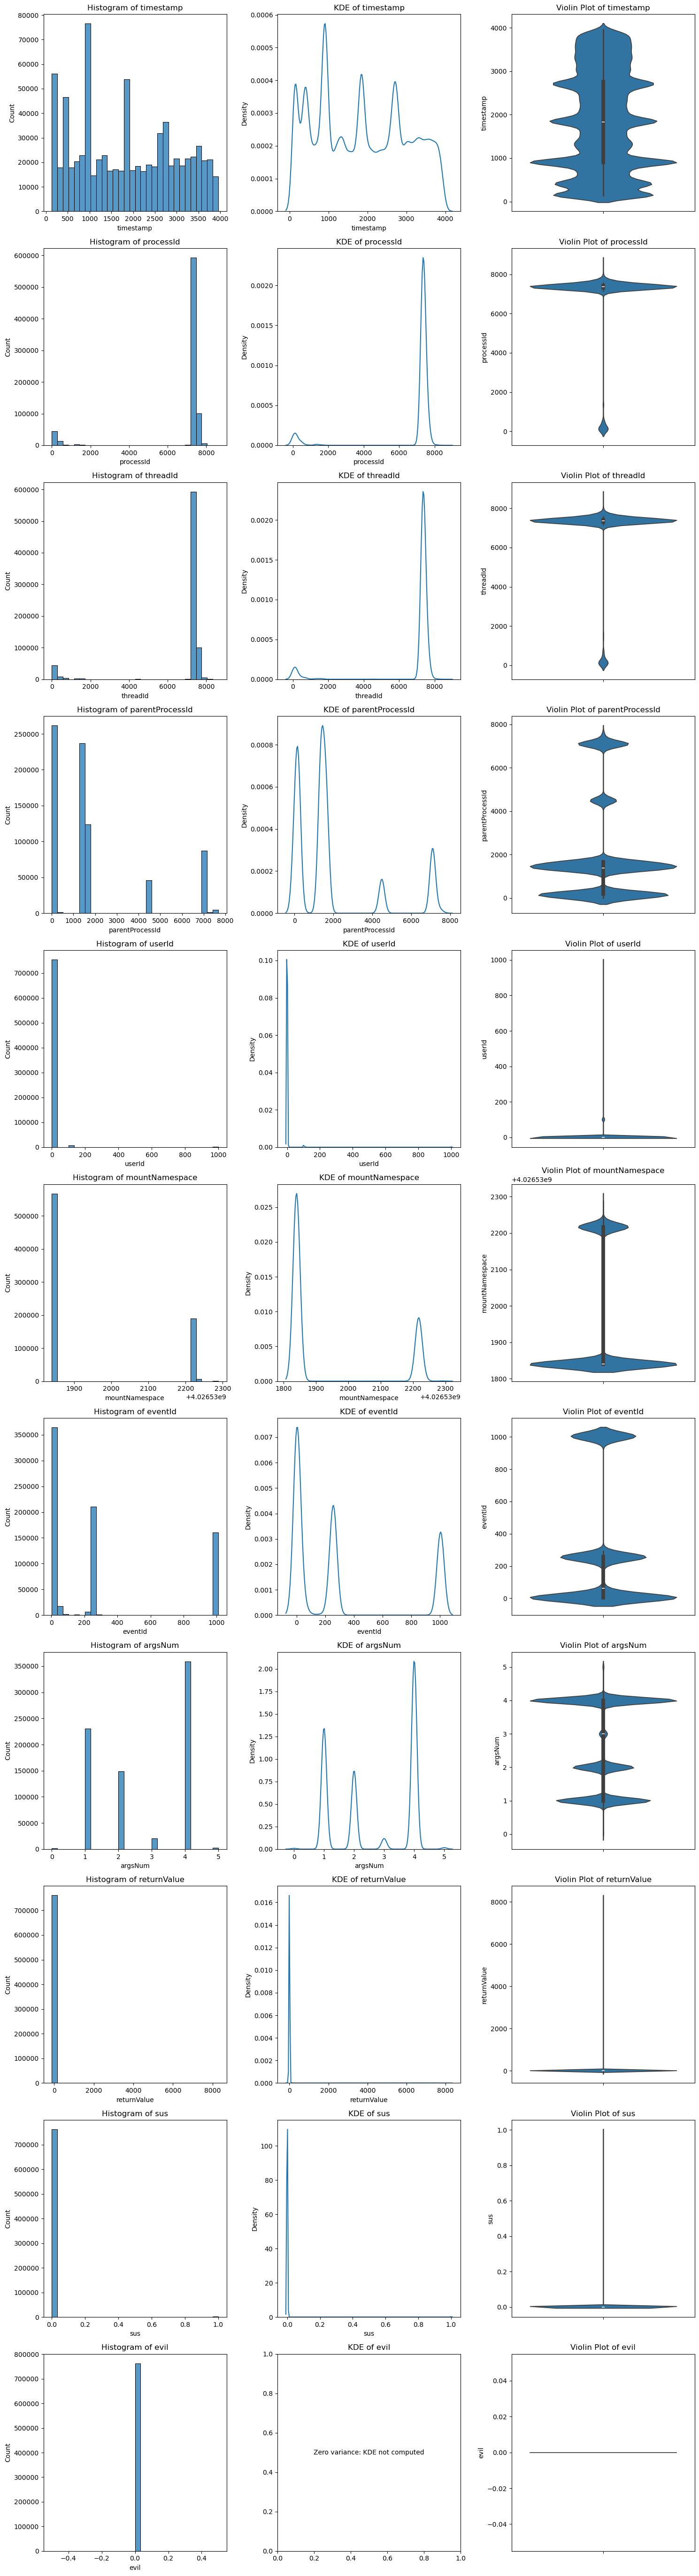

In [9]:
continuous_plots(beth_df)

### Categorical

Although I wrote a function for categorical countplots, due to the nature of the data, I select the categorical plots individually and plot them. I will also run the value_counts() method on the columns that are categorical, but cannot fit on a countplot.

/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_648/3678344226.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col in df.columns and (pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == object)


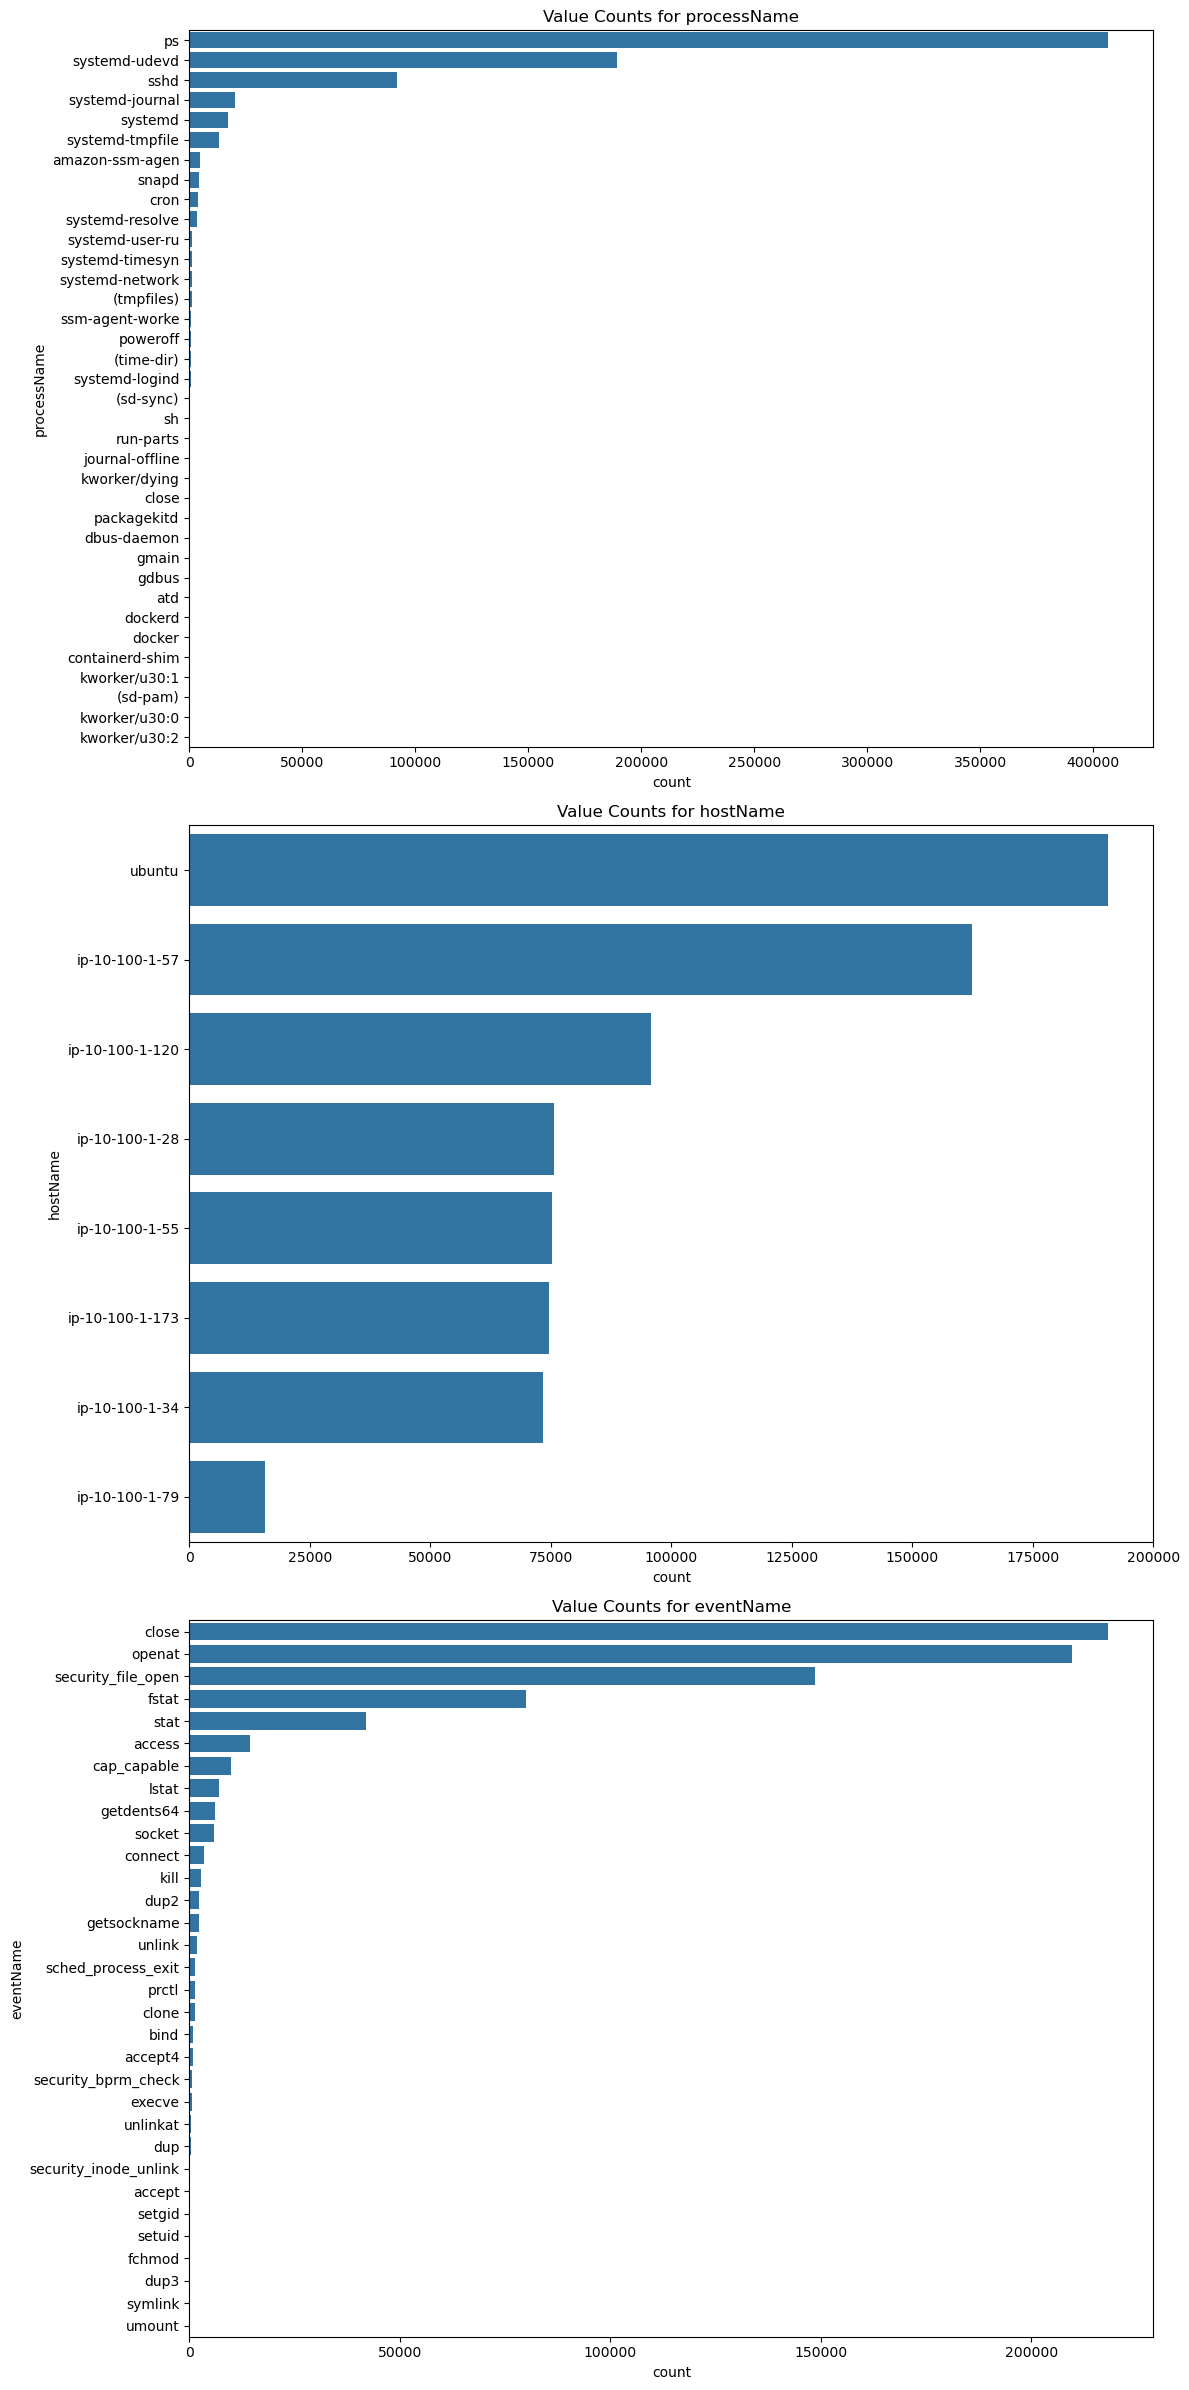

In [10]:
categorical_counts_plots(beth_df, ['processName', 'hostName', 'eventName'], figsize=(12,8))

Although 'stackAddresses' and 'args' are categorical, there are far too many to plot as a bar plot. So I will simply show the value_counts() to highlight the class distributions.

In [11]:
beth_df['stackAddresses'].value_counts()

stackAddresses
[]                                        521115
[139692889307527]                           2818
[139692889305126]                           2339
[140214269716871]                           1366
[139743267876902]                           1281
                                           ...  
[140018552864427, 8463496752512578614]         1
[140018552864427, 7596557092445434932]         1
[140018552864427, 8463496752512578612]         1
[140018552864427, 32758250075010100]           1
[140537881032027, 94764242875824]              1
Name: count, Length: 97050, dtype: int64

In [12]:
beth_df['args'].value_counts()

args
[{'name': 'fd', 'type': 'int', 'value': 9}]                                                                                                                                                                                                     107321
[{'name': 'fd', 'type': 'int', 'value': 6}]                                                                                                                                                                                                      30609
[{'name': 'fd', 'type': 'int', 'value': 15}]                                                                                                                                                                                                     22985
[{'name': 'fd', 'type': 'int', 'value': 3}]                                                                                                                                                                                                      18876
[{'name

As you can see the length of each of these value counts are enourmous. 

There is quite a bit of class imbalance here. This is to be expected with the nature of this data. Potentially could remedy with SMOTE

### Mean, median and mode

In [13]:
calculate_summary_stats(beth_df)

,mean,median,mode
timestamp,1.844583e+03,1.829204e+03,1.336587e+02
processId,6.814763e+03,7.365000e+03,1.590000e+02
threadId,6.820265e+03,7.365000e+03,1.590000e+02
parentProcessId,1.882217e+03,1.385000e+03,1.870000e+02
userId,2.279034e+00,0.000000e+00,0.000000e+00
mountNamespace,4.026532e+09,4.026532e+09,4.026532e+09
eventId,2.881590e+02,6.200000e+01,3.000000e+00
argsNum,2.672082e+00,3.000000e+00,4.000000e+00
returnValue,1.752092e+01,0.000000e+00,0.000000e+00
sus,1.662858e-03,0.000000e+00,0.000000e+00


---

## Cyber dataset

In [14]:
cyber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

### Continuous

In [15]:
cyber_df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


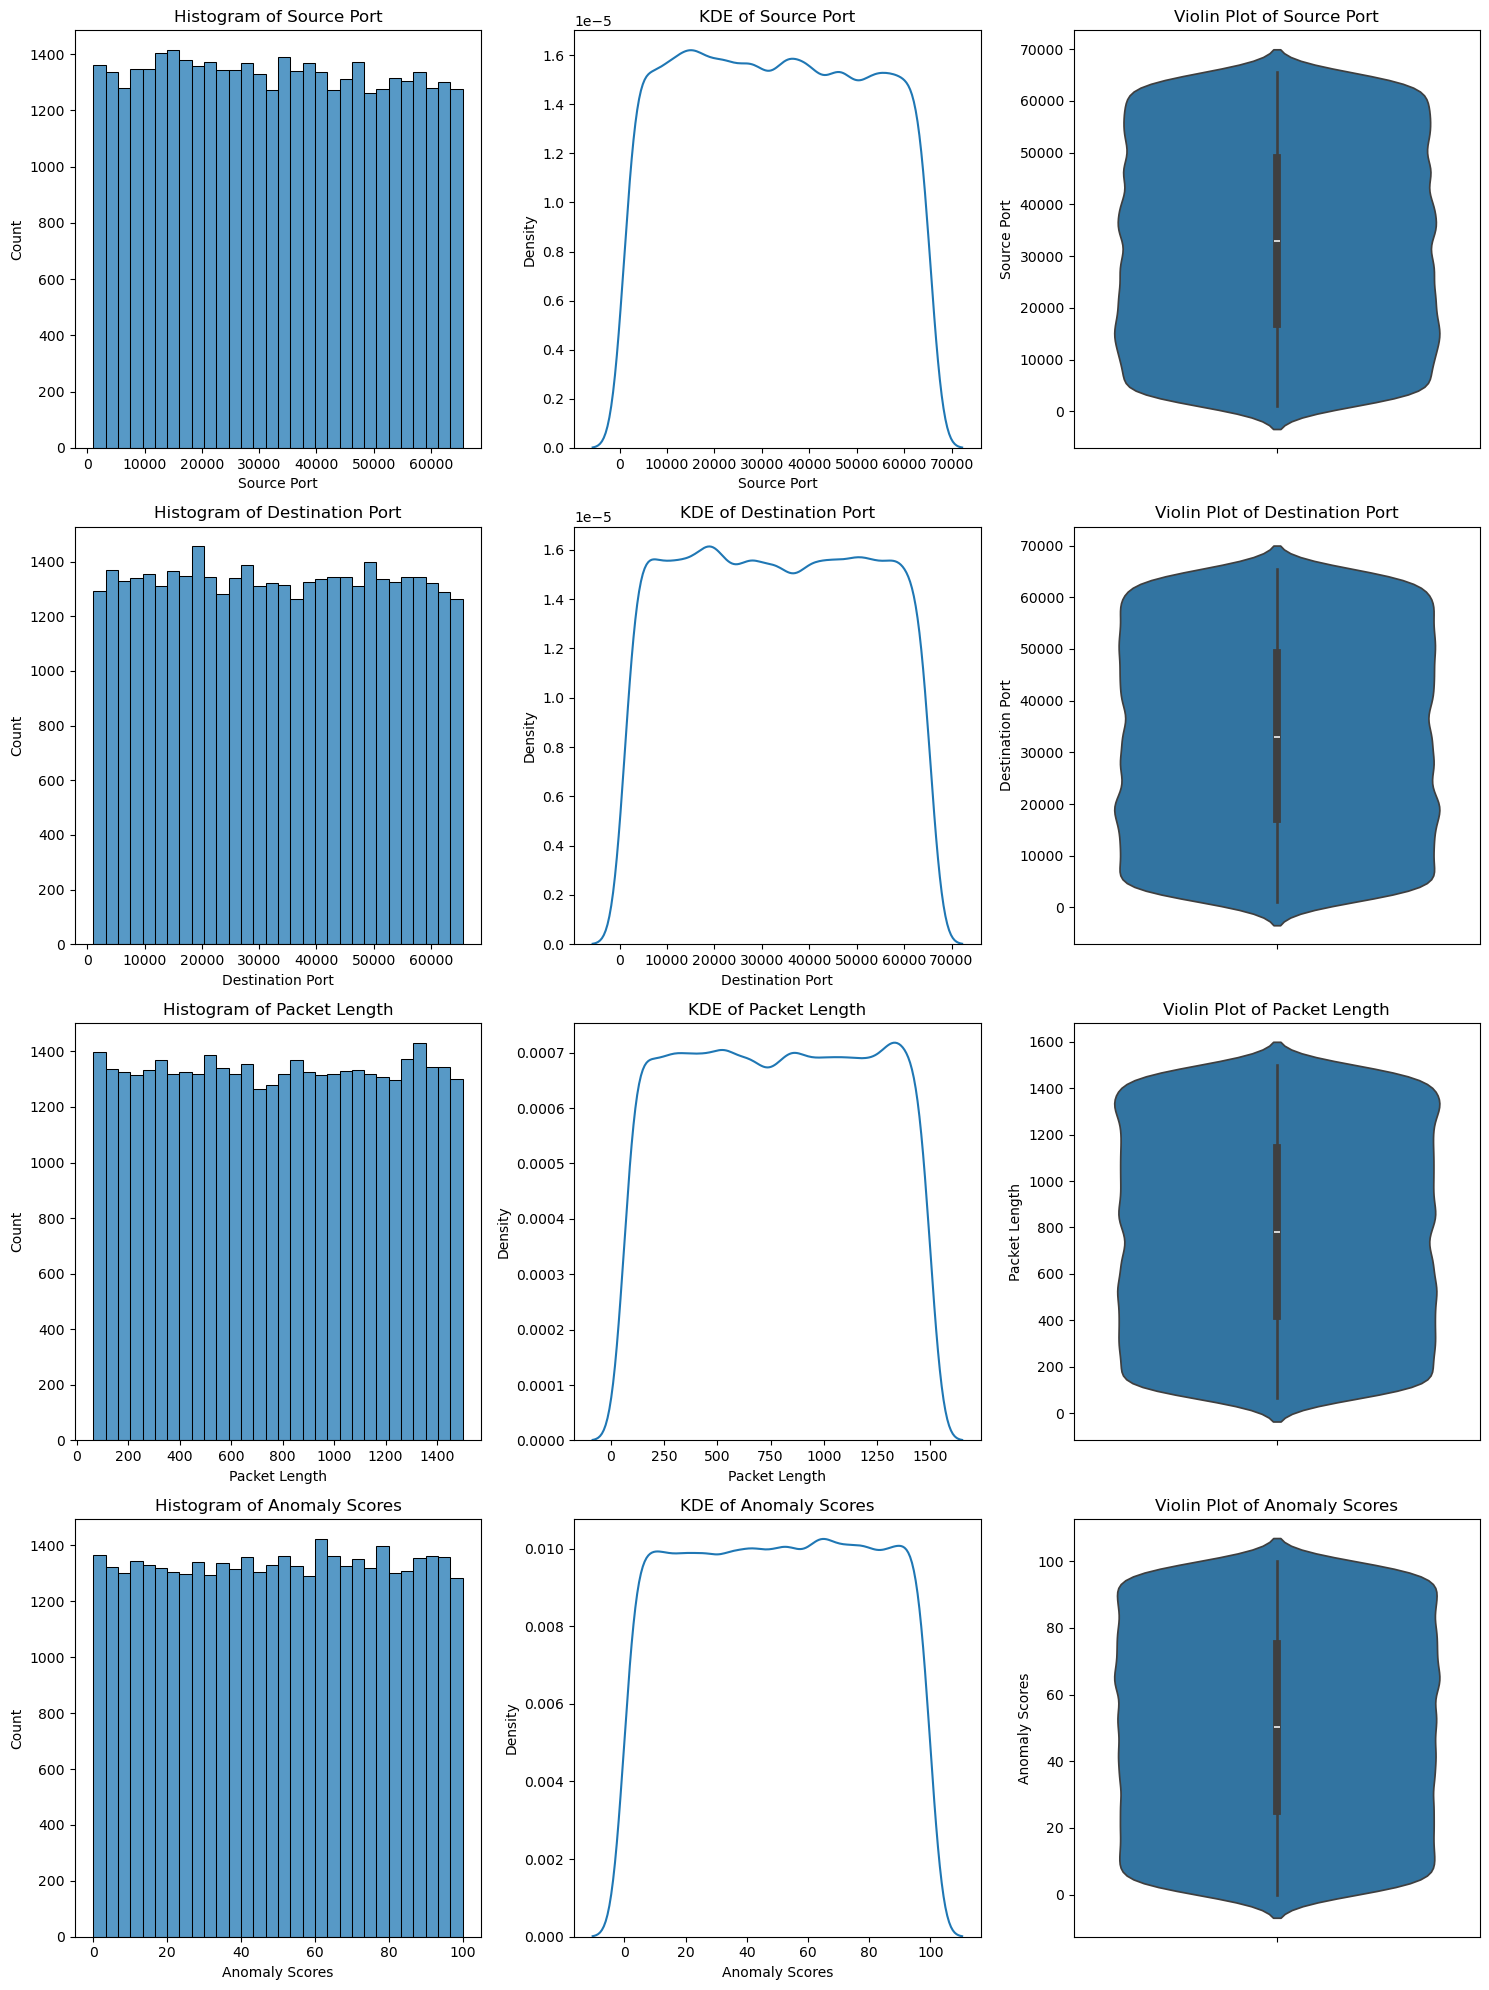

In [16]:
continuous_plots(cyber_df, ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores'])

### Categorical

In [17]:
cyber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_648/3678344226.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col in df.columns and (pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == object)


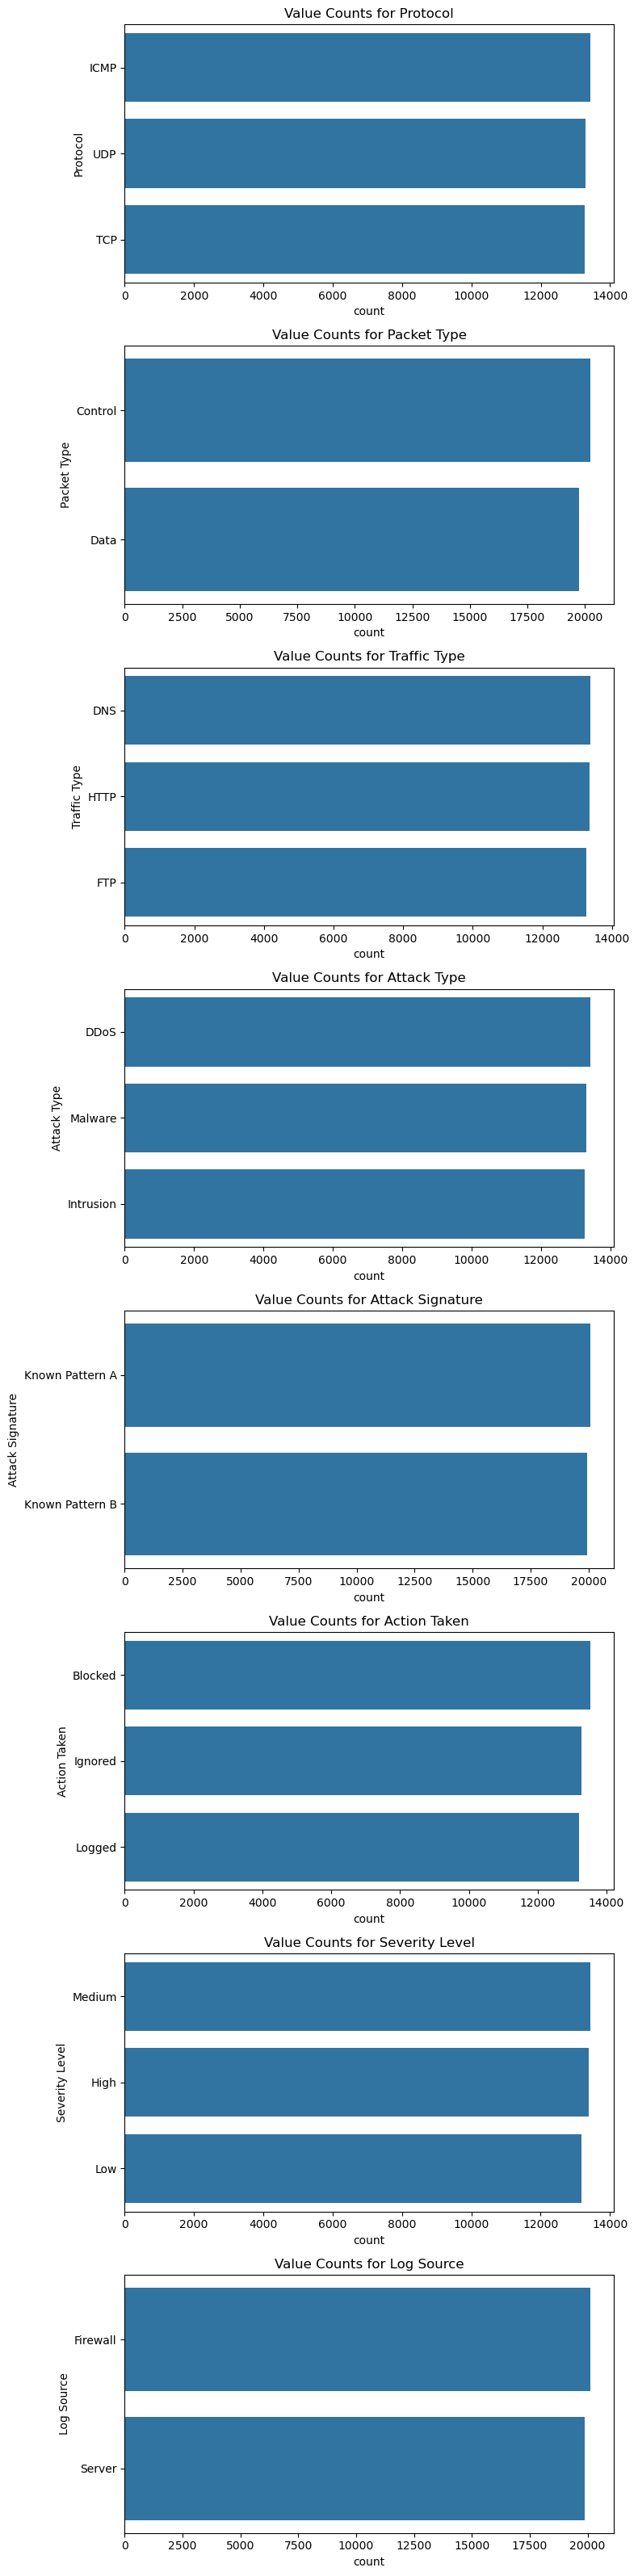

In [18]:
categorical_counts_plots(cyber_df, ['Protocol', 'Packet Type', 'Traffic Type', 'Attack Type', 'Attack Signature', 'Action Taken','Severity Level', 'Network Segment,', 'Log Source'])

### Mean, median and mode

In [19]:
calculate_summary_stats(cyber_df)

,mean,median,mode
Source Port,32970.356450,32856.000,41341.00
Destination Port,33150.868650,33004.500,7508.00
Packet Length,781.452725,782.000,1037.00
Anomaly Scores,50.113473,50.345,15.39


---

### UNSW dataset

In [20]:
UNSW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sjit               175341 non-null

### Continuous

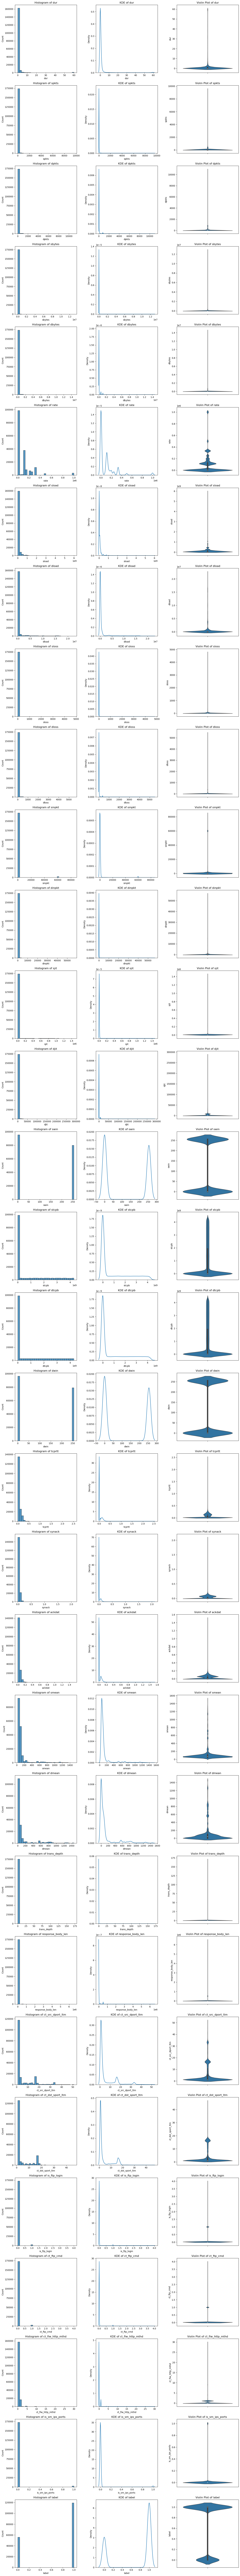

In [21]:
continuous_plots(UNSW_df)

### Categorical

In [22]:
UNSW_df['proto'].value_counts()

proto
tcp      79946
udp      63283
unas     12084
arp       2859
ospf      2595
         ...  
argus       98
hmp         98
igmp        18
icmp        15
rtp          1
Name: count, Length: 133, dtype: int64

/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_648/3678344226.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col in df.columns and (pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == object)


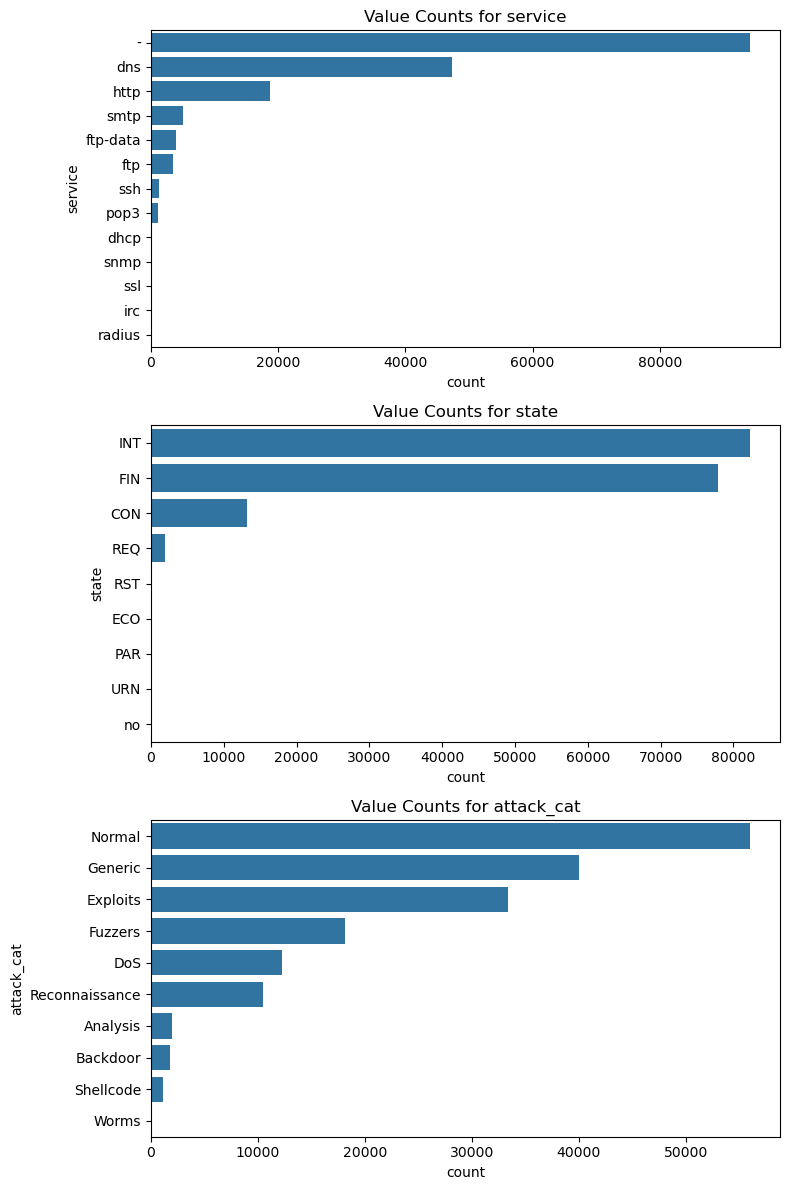

In [23]:
categorical_counts_plots(UNSW_df, ['service', 'state', 'attack_cat'])

The 'proto' column contained 133 different categories, so I decided on not plotting it as a bar chart.

In [24]:
UNSW_df['proto'].value_counts()

proto
tcp      79946
udp      63283
unas     12084
arp       2859
ospf      2595
         ...  
argus       98
hmp         98
igmp        18
icmp        15
rtp          1
Name: count, Length: 133, dtype: int64

### Mean, median and mode

In [25]:
calculate_summary_stats(UNSW_df)

,mean,median,mode
dur,1.359389e+00,0.001582,9.000000e-06
spkts,2.029866e+01,2.000000,2.000000e+00
dpkts,1.896959e+01,2.000000,0.000000e+00
sbytes,8.844844e+03,430.000000,1.140000e+02
dbytes,1.492892e+04,164.000000,0.000000e+00
rate,9.540618e+04,3225.806641,1.111111e+05
sload,7.345403e+07,879674.750000,5.066666e+07
dload,6.712055e+05,1447.022705,0.000000e+00
sloss,4.953000e+00,0.000000,0.000000e+00
dloss,6.948010e+00,0.000000,0.000000e+00


### Conclusion

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

    + Several distributions appear unifromly distributed. Howmever much of the data is skewed and or bimodal.

+ If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

    + Many of the columns range from 0 to 1

+ How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

    + While changing bin size may affect histogram, the KDE and violin plots will continue to show the smoothed shape of the overall distribution

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

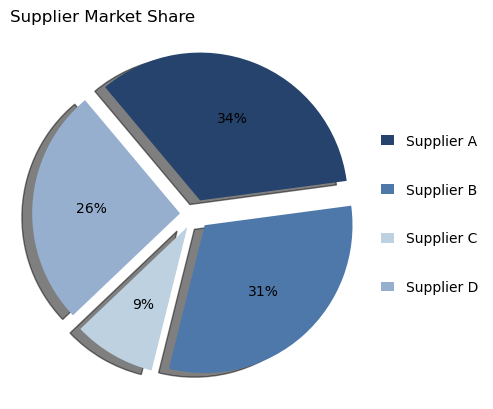

In [26]:
import matplotlib.pyplot as plt

labels = 'Supplier A', 'Supplier B', 'Supplier C', 'Supplier D'
sizes = [34, 31, 9, 26]

explode = (0.1, 0.1, 0.1, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, colors=['#25436c','#4e78aa','#bdd1e0','#97afcf'], labels=None, autopct='%1.f%%',
       shadow={'ox': -0.05, 'edgecolor': 'black', 'shade': 1}, startangle= 130, counterclock=False,)
plt.title('Supplier Market Share',loc='left')
plt.legend(labels, loc='right', bbox_to_anchor=(1.3, 0.5), labelspacing=2.5, handlelength=1).get_frame().set_visible(False)

plt.show()

### Figure 2.22 <i>Pie chart with labeled segments</i> pg 63